# Example Flattening the Curve

The top example shows no suppression wihle the bottom shows a 50% suppression policy.

In [70]:
%load_ext autoreload
%autoreload 2
import sys
import yaml
PATH_TO_PYSEIR_ROOT = '/Users/xzhang/Documents/covid/county_covid_seir_models/'
sys.path.append(PATH_TO_PYSEIR_ROOT)

import numpy as np
import pandas as pd
from pyseir.models.seir_model import SEIRModel
from pyseir.models.supression_policies import generate_triggered_suppression_model
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from pyseir.models.age_structure import extract_contact_matrices

In [78]:
config = yaml.safe_load(open('../pyseir/config.yaml').read())

In [143]:
#california demographics
age_dist = pd.DataFrame({'lower.age.limit': [0, 5, 10, 15, 20, 25, 35, 45, 55, 60, 65, 75, 85],
                         'population_frac': [0.061, 0.061, 0.067, 0.065, 0.069, 0.153, 0.133, 0.128, 0.063, 0.058, 0.083, 0.042, 0.018]})
age_dist['population'] = age_dist['population_frac'] * 100000
age_dist.to_csv('/Users/xzhang/Documents/covid/county_covid_seir_models/pyseir/age_dist_test.csv')

In [144]:
contact_matrices, age_groups = extract_contact_matrices(config)

In [145]:
age_cutoff = age_groups['age.group'].apply(lambda s: int(re.sub("[b'+[)]", '', str(s)).split(',')[0])).values

In [152]:
# some fabricated data
mortality_rate = [0.001, 0.0015, 0.002, 0.0025, 0.0025, 0.0035, 0.004, 0.0045, 0.006, 0.0075, 0.0095, 0.015]

hospitalization_rate_general = 0.05
hospitalization_rate_icu = 0.05

/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


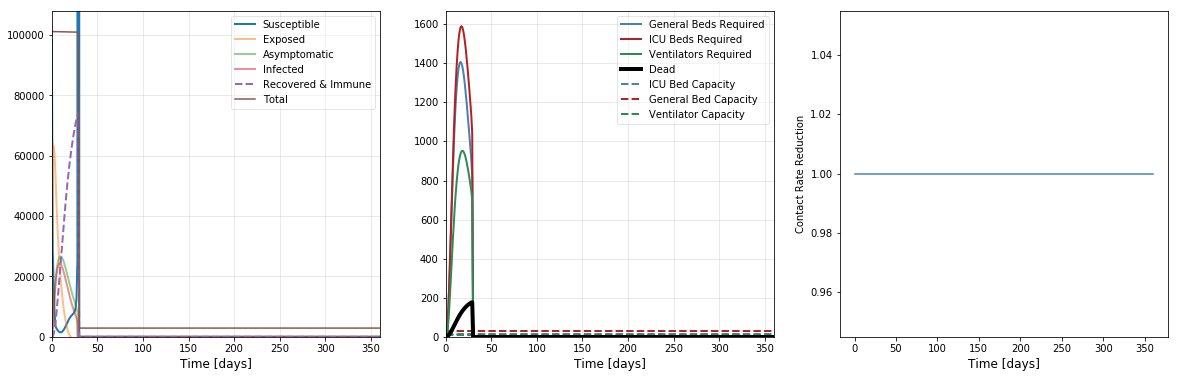

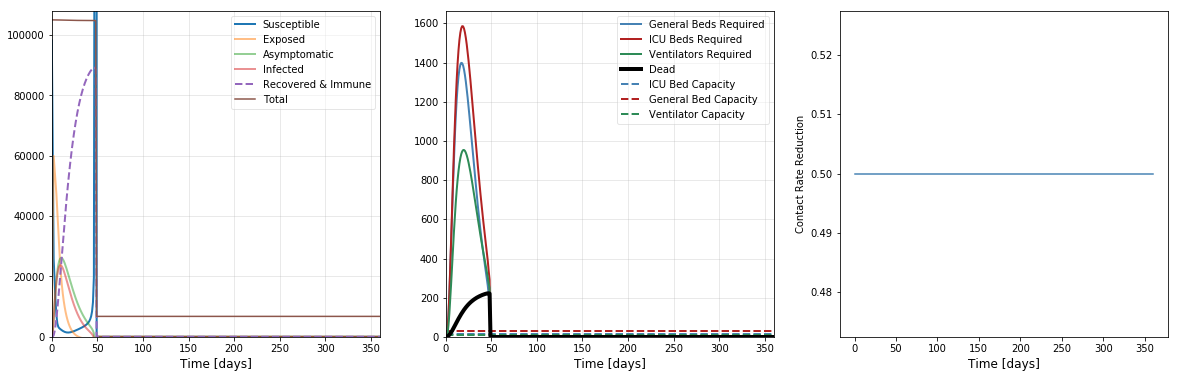

In [154]:
n_days = 360
t_list = np.linspace(0, n_days, n_days)
suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=60, open_days=0, reduction=1)

model = SEIRModel(
    N=age_dist['population'].values[:-1],
    I_initial = np.array([1] * 12),
    A_initial = np.array([1] * 12),
    R_initial = np.zeros(12),
    E_initial = np.zeros(12),
    D_initial = 0,
    HGen_initial = np.zeros(12),
    HICU_initial = np.zeros(12),
    HICUVent_initial = np.zeros(12),
    mortality_rate=mortality_rate,
    t_list=t_list,
    R0=2.4,
    age_cutoff=age_cutoff,
    contact_rate=contact_matrices,
    hospitalization_rate_general=hospitalization_rate_general,
    hospitalization_rate_icu=hospitalization_rate_icu,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')

suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=60, open_days=0, reduction=.5)
model = SEIRModel(
    N=age_dist['population'].values[:-1],
    I_initial = np.array([1] * 12),
    A_initial = np.array([1] * 12),
    R_initial = np.zeros(12),
    E_initial = np.zeros(12),
    D_initial = 0,
    HGen_initial = np.zeros(12),
    HICU_initial = np.zeros(12),
    HICUVent_initial = np.zeros(12),
    mortality_rate=mortality_rate,
    t_list=t_list,
    R0=2,
    age_cutoff=age_cutoff,
    contact_rate=contact_matrices,
    hospitalization_rate_general=hospitalization_rate_general,
    hospitalization_rate_icu=hospitalization_rate_icu,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')

# This Shows a Triggered Policy 
In this case the trigger is simply periodic lockdown here rather than adaptive.

/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


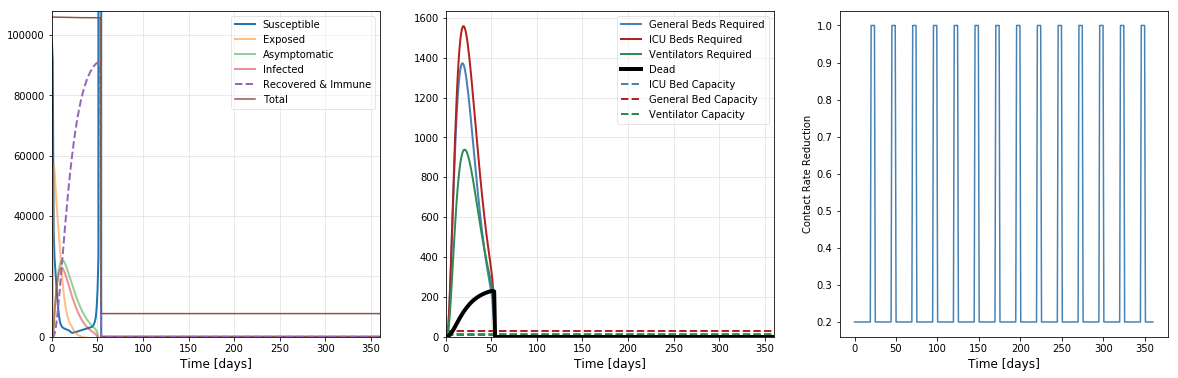

In [155]:
suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=20, open_days=5, reduction=.2)
model = SEIRModel(
    N=age_dist['population'].values[:-1],
    I_initial = np.array([1] * 12),
    A_initial = np.array([1] * 12),
    R_initial = np.zeros(12),
    E_initial = np.zeros(12),
    D_initial = 0,
    HGen_initial = np.zeros(12),
    HICU_initial = np.zeros(12),
    HICUVent_initial = np.zeros(12),
    mortality_rate=mortality_rate,
    t_list=t_list,
    R0=2.4,
    age_cutoff=age_cutoff,
    contact_rate=contact_matrices,
    hospitalization_rate_general=hospitalization_rate_general,
    hospitalization_rate_icu=hospitalization_rate_icu,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')